In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-latest.csv'
regioni_dpc = pd.read_csv(url,
                     usecols=['denominazione_regione', 'totale_casi'],
                     index_col=['denominazione_regione'],
                     squeeze=True).sort_index()
regioni_dpc

denominazione_regione
Abruzzo                   3265
Basilicata                 399
Calabria                  1159
Campania                  4828
Emilia-Romagna           27928
Friuli Venezia Giulia     3284
Lazio                     7828
Liguria                   9826
Lombardia                90389
Marche                    6747
Molise                     436
P.A. Bolzano              2604
P.A. Trento               4436
Piemonte                 30869
Puglia                    4512
Sardegna                  1362
Sicilia                   3452
Toscana                  10144
Umbria                    1432
Valle d'Aosta             1191
Veneto                   19187
Name: totale_casi, dtype: int64

In [26]:
readme = r'regioni.csv'
regioni_info = pd.read_csv(readme, index_col="Regione")
regioni_info.sort_index(inplace=True)
regioni_info

,Popolazione,Superficie,Densità,Comuni,Province,Confini
Regione,,,,,,
Abruzzo,1311580,10831,121,305,4,Marche;Molise;Lazio
Basilicata,562869,10073,56,131,2,Campania;Calabria;Puglia
Calabria,1947131,15221,128,404,5,Basilicata;Sicilia
Campania,5801692,13670,424,550,5,Lazio;Molise;Basilicata;Puglia
Emilia-Romagna,4459477,22452,199,328,9,Lombardia;Liguria;Toscana;Veneto;Marche
Friuli Venezia Giulia,1215220,7924,153,215,4,Veneto
Lazio,5879082,17232,341,378,5,Toscana;Umbria;Abruzzo;Campania;Sardegna
Liguria,1550640,5416,286,234,4,Emilia-Romagna;Piemonte
Lombardia,10060574,23863,422,1506,12,Trentino-Alto Adige;Veneto;Piemonte;Emilia-Rom...


In [27]:
regioni_dpc_tot = regioni_dpc.values.sum()
regioni_dpc_tot

235278

In [38]:
regioni_dpc_distribution = {}
for r in regioni_info.index:
    if "Trent" not in r:
        regioni_dpc_distribution.update({
            r: regioni_dpc[r] / regioni_dpc_tot
        })
    else:
        regioni_dpc_distribution.update({
            r: (regioni_dpc["P.A. Bolzano"]+regioni_dpc["P.A. Trento"]) / regioni_dpc_tot
        })
print(regioni_dpc_distribution)
print(sum(regioni_dpc_distribution.values()))

{'Abruzzo': 0.013877200588240294, 'Basilicata': 0.001695866166832428, 'Calabria': 0.004926087436989433, 'Campania': 0.020520405647786875, 'Emilia-Romagna': 0.11870213109598007, 'Friuli Venezia Giulia': 0.01395795611999422, 'Lazio': 0.03327127908261716, 'Liguria': 0.04176336079021413, 'Lombardia': 0.3841795663002916, 'Marche': 0.028676714354933314, 'Molise': 0.0018531269391953349, 'Piemonte': 0.1312022373532587, 'Puglia': 0.01917731364598475, 'Sardegna': 0.00578889653941295, 'Sicilia': 0.014672005032344716, 'Toscana': 0.04311495337430614, 'Trentino-Alto Adige': 0.029922049660401736, 'Umbria': 0.00608641691955899, "Valle d'Aosta": 0.005062096753627623, 'Veneto': 0.08155033619802957}
1.0


In [41]:
def from_region(r, c, key="Popolazione"):
    confini = regioni_info.iloc[r]["Confini"].split(";")
    if r == c:
        _p = 1/len(confini)
        p = 1
        for confine in confini:
            p_move = _p * min(
                regioni_info.loc[confine][key]/regioni_info.iloc[r][key],
                1
            )
            p -= p_move
        return p
    if regioni_info.iloc[c].name in confini:
        p = 1/len(regioni_info.iloc[c]["Confini"].split(";")) * min(
            regioni_info.iloc[r][key]/regioni_info.iloc[c][key],
            1
        )
        return p
    return 0

In [45]:
regioni_matrix_pop = np.zeros((20,20))
for r in range(20):
    for c in range(20):
        regioni_matrix_pop[r,c] = from_region(r, c)
print(regioni_matrix_pop.sum(axis=0))
pd.DataFrame(regioni_matrix_pop)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.255662,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.044619,0.0,0.000000,0.286633,3.333333e-01,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000
1,0.000000,1.110223e-16,0.144538,0.024255,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.046568,0.0,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000
2,0.000000,3.333333e-01,0.355462,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.389435,0.000000,0.0,0.000000e+00,0.0,0.000000
3,0.000000,3.333333e-01,0.000000,0.538961,0.000000,0.0,0.197367,0.0,0.000000,0.000000,3.333333e-01,0.000000,0.333333,0.0,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000
4,0.000000,0.000000e+00,0.000000,0.000000,0.294783,0.0,0.000000,0.5,0.110816,0.333333,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.333333,0.0,0.000000e+00,0.0,0.227253
5,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000e+00,0.0,0.061927
6,0.333333,0.000000e+00,0.000000,0.250000,0.000000,0.0,0.545354,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.0,0.000000,0.333333,0.0,3.333333e-01,0.0,0.000000
7,0.000000,0.000000e+00,0.000000,0.000000,0.069544,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.118648,0.000000,0.0,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000
8,0.000000,0.000000e+00,0.000000,0.000000,0.200000,0.0,0.000000,0.0,0.632377,0.000000,0.000000e+00,0.333333,0.000000,0.0,0.000000,0.000000,0.5,0.000000e+00,0.0,0.250000
9,0.333333,0.000000e+00,0.000000,0.000000,0.068406,0.0,0.000000,0.0,0.000000,0.187278,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,3.333333e-01,0.0,0.000000


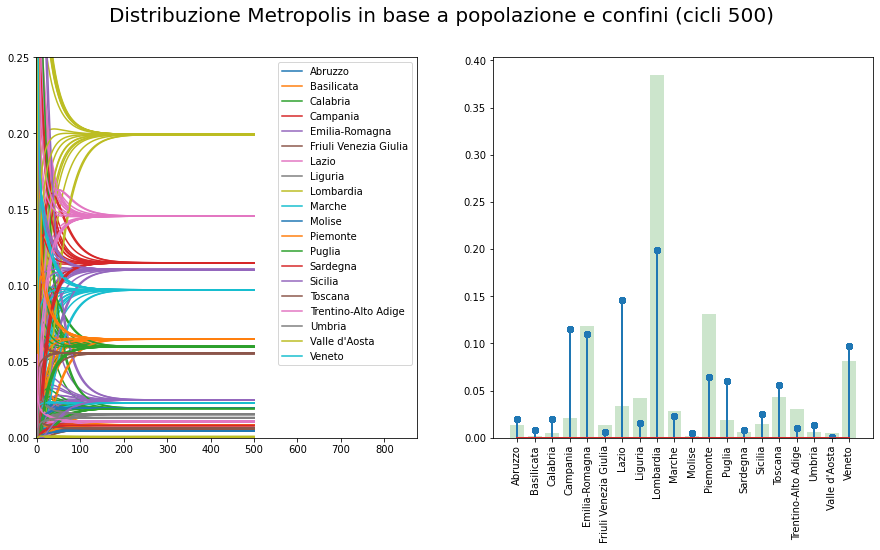

In [84]:
iterations = 500

fig, ax = plt.subplots(1, 2, figsize=(15,7))

tot = regioni_info["Popolazione"].sum()
for j in range(20):
    d = np.zeros(20)
    #d[(regioni_info.index == "Lombardia").nonzero()[0][0]] = 1
    #d = [1/len(regioni_info) for _ in regioni_info.index]
    d[j] = 1
    percorso = [d]
    for i in range(iterations):
        d = regioni_matrix_pop @ d
        percorso.append(d)

    for r in range(20):
        if not j:
            ax[0].plot(np.array(percorso)[:,r], label=regioni_info.iloc[r].name, color=f"C{r}")
        else:
            ax[0].plot(np.array(percorso)[:,r], color=f"C{r}")
        #ax[0].text(iterations, percorso[iterations-1][r], regioni_info.iloc[r].name)

    ax[1].stem(d, use_line_collection=True)

ax[1].set_xticks(np.arange(20))
ax[1].set_xticklabels(regioni_info.index, rotation=90)
ax[1].bar(np.arange(20), [regioni_dpc_distribution[r] for r in regioni_info.index], color="g", alpha=.2)

ax[0].legend()
ax[0].set_xlim(-1, iterations*1.75)
ax[0].set_ylim(0, .25)

fig.set_facecolor('w')
plt.suptitle(
    f"Distribuzione Metropolis in base a popolazione e confini (cicli {iterations})",
    fontsize=20
)
plt.show();